In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0  # Normalize pixel values between 0 and 1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Define the generator model
def build_generator(latent_dim):
    generator = Sequential()
    generator.add(Dense(128, input_dim=latent_dim))
    generator.add(LeakyReLU(alpha=0.01))
    generator.add(Dense(784, activation='sigmoid'))
    generator.add(Reshape((28, 28, 1)))
    return generator

# Define the discriminator model
def build_discriminator():
    discriminator = Sequential()
    discriminator.add(Flatten(input_shape=(28, 28, 1)))
    discriminator.add(Dense(128))
    discriminator.add(LeakyReLU(alpha=0.01))
    discriminator.add(Dense(1, activation='sigmoid'))
    return discriminator

# Compile the discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Compile the combined GAN model
latent_dim = 100
generator = build_generator(latent_dim)
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Define a function to train the GAN
def train_gan(X_train, latent_dim, epochs=100, batch_size=128):
    for epoch in range(epochs):
        # Train discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)
        real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
        X = np.concatenate([real_images, fake_images])
        y_dis = np.zeros(2 * batch_size)
        y_dis[:batch_size] = 0.9  # Label smoothing
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y_dis)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        # Print progress
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}')
            save_generated_images(epoch, generator)

# Define a function to save generated images
def save_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')
    plt.close()

# Train the GAN
train_gan(X_train, latent_dim, epochs=10000, batch_size=128)

11490434/11490434 [==============================] - 1s 0us/step


4/4 [==============================] - 0s 604us/step
Epoch 0, Discriminator Loss: 0.7745993733406067, Generator Loss: 2.042733669281006
4/4 [==============================] - 0s 658us/step
Epoch 10, Discriminator Loss: 0.1952962577342987, Generator Loss: 3.677947998046875
4/4 [==============================] - 0s 612us/step
Epoch 20, Discriminator Loss: 0.18053880333900452, Generator Loss: 4.873543739318848
4/4 [==============================] - 0s 628us/step
Epoch 30, Discriminator Loss: 0.17803387343883514, Generator Loss: 5.204812526702881
4/4 [==============================] - 0s 676us/step
Epoch 40, Discriminator Loss: 0.17501968145370483, Generator Loss: 5.373940467834473
4/4 [==============================] - 0s 682us/step
Epoch 50, Discriminator Loss: 0.17815443873405457, Generator Loss: 5.004925727844238
4/4 [==============================] - 0s 660us/step
Epoch 60, Discriminator Loss: 0.18782001733779907, Generator Loss: 4.506382465362549
4/4 [==============================] 

1/1 [==============================] - 0s 8ms/step


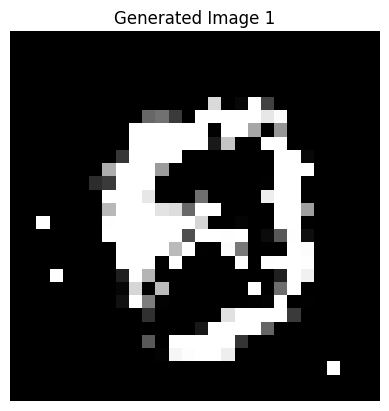

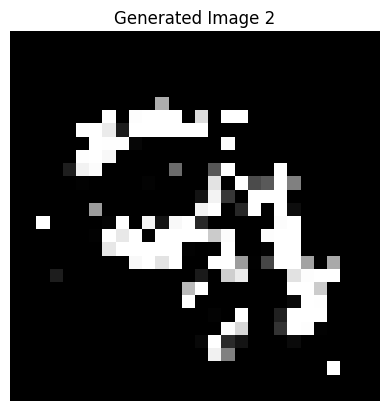

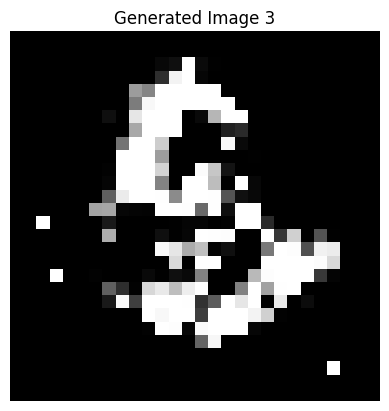

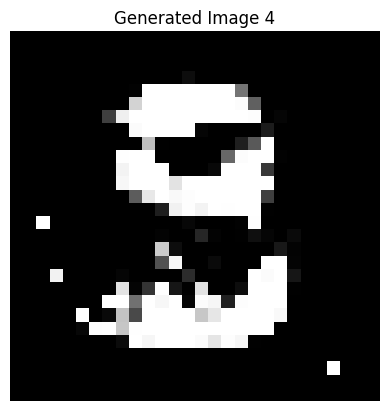

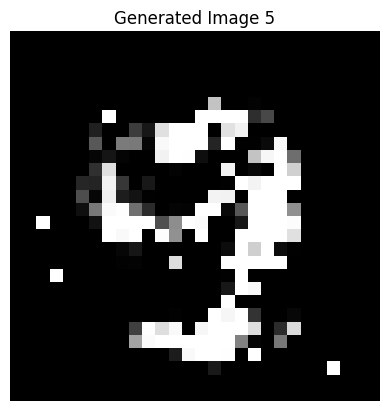

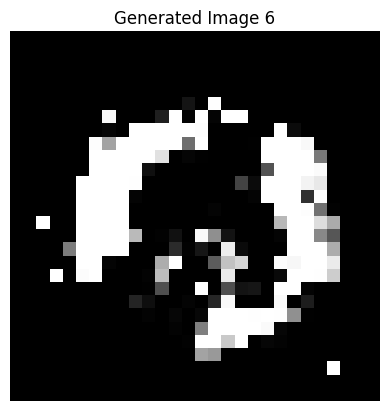

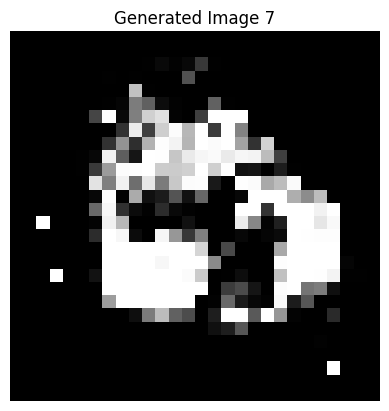

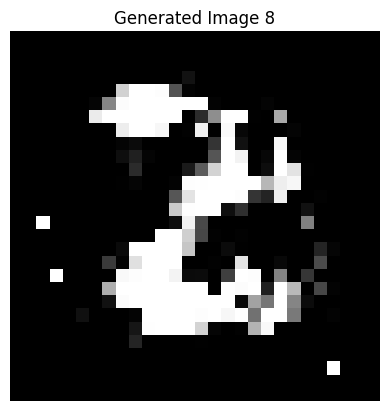

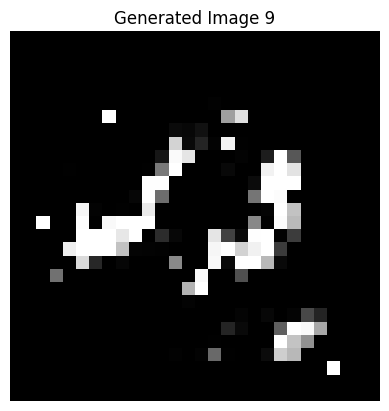

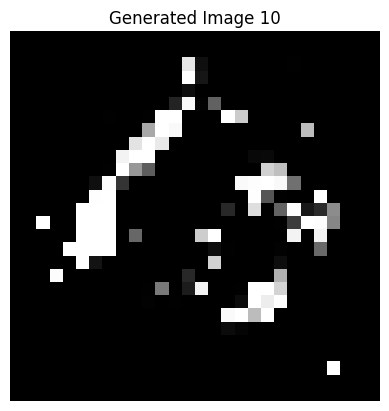

In [3]:
# Generate new images
def generate_images(generator, latent_dim, num_images):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(num_images, 28, 28)
    return generated_images

# Example: Generate 10 new images
new_images = generate_images(generator, latent_dim, 10)

# Print new images and their discriminator predictions
for i in range(len(new_images)):
    plt.imshow(new_images[i], cmap='gray')
    plt.title(f'Generated Image {i+1}')
    plt.axis('off')
    plt.show()

In [4]:
# Discriminate images
def discriminate_images(discriminator, images):
    # Reshape images for the discriminator
    images = images.reshape(-1, 28, 28, 1)
    # Predict the probability of each image being real (1) or fake (0)
    predictions = discriminator.predict(images)
    return predictions

# Example: Discriminate the new images
predictions = discriminate_images(discriminator, new_images)
print(predictions)

1/1 [==============================] - 0s 17ms/step
[[0.00817606]
 [0.04873401]
 [0.01157205]
 [0.05318583]
 [0.00102786]
 [0.00456638]
 [0.01021033]
 [0.02932988]
 [0.03719237]
 [0.01373715]]


In [ ]:
#### Cifar100 or ImageNEt

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np

# Load CIFAR-100 dataset
(train_images, train_labels), (_, _) = cifar100.load_data(label_mode='fine')

# Select 100 relevant images
relevant_classes = [2, 4, 6, 8, 10]  # Example: Selecting 5 classes
relevant_images = []
for label in relevant_classes:
    relevant_indices = np.where(train_labels.flatten() == label)[0][:500]  # Select first 20 images from each class
    relevant_images.extend(train_images[relevant_indices])

# Convert list to numpy array
relevant_images = np.array(relevant_images)

# Normalize pixel values to range [0, 1]
relevant_images = relevant_images / 255.0

# Print shape of relevant images
print("Shape of relevant images:", relevant_images.shape)

Shape of relevant images: (2500, 32, 32, 3)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-100 dataset with 1 or 2 classes
(train_images, train_labels), (_, _) = cifar100.load_data()
train_images = train_images / 255.0  # Normalize pixel values between 0 and 1

# Filter dataset for classes 0 and 1
class_indices = [4,6,8]
selected_indices = [i for i, label in enumerate(train_labels) if label[0] in class_indices]
train_images = train_images[selected_indices]
train_labels = train_labels[selected_indices]


# Define the generator model
def build_generator(latent_dim):
    generator = Sequential()
    generator.add(Dense(128, input_dim=latent_dim))
    generator.add(LeakyReLU(alpha=0.01))
    generator.add(Dense(3072, activation='sigmoid'))
    generator.add(Reshape((32, 32, 3)))
    return generator

# Define the discriminator model
def build_discriminator():
    discriminator = Sequential()
    discriminator.add(Flatten(input_shape=(32, 32, 3)))
    discriminator.add(Dense(128))
    discriminator.add(LeakyReLU(alpha=0.01))
    discriminator.add(Dense(1, activation='sigmoid'))
    return discriminator

# Compile the discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Compile the combined GAN model
latent_dim = 100
generator = build_generator(latent_dim)
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Define a function to train the GAN
def train_gan(train_images, latent_dim, epochs=500, batch_size=128):
    for epoch in range(epochs):
        # Train discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)
        real_images = train_images[np.random.randint(0, train_images.shape[0], batch_size)]
        X = np.concatenate([real_images, fake_images])
        y_dis = np.zeros(2 * batch_size)
        y_dis[:batch_size] = 0.9  # Label smoothing
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y_dis)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)

        # Calculate precision
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_images = generator.predict(noise)
        real_pred = discriminator.predict(real_images).ravel()
        fake_pred = discriminator.predict(generated_images).ravel()
        precision = 0.5 * (np.mean(real_pred > 0.5) + np.mean(fake_pred < 0.5))

        

        # Check if precision meets desired threshold
        if precision >= 0.999:
            print(f'Reached desired precision desired at epoch {epoch}')
            break

# Train the GAN
train_gan(train_images, latent_dim, epochs=2000, batch_size=128)

4/4 [==============================] - 0s 584us/step


1/1 [==============================] - 0s 9ms/step


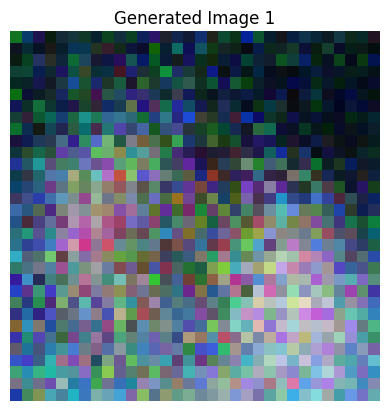

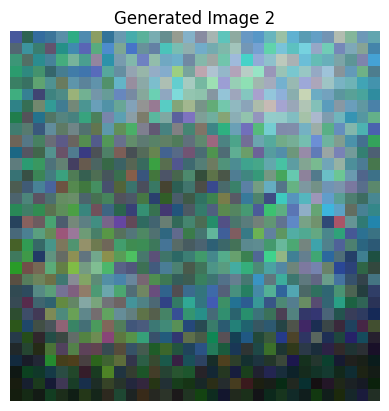

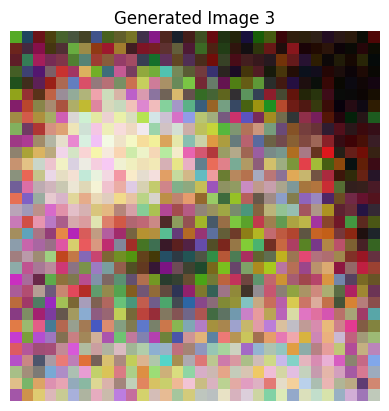

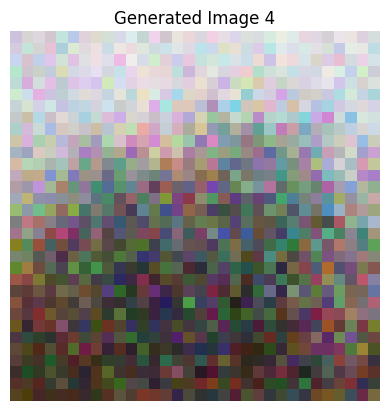

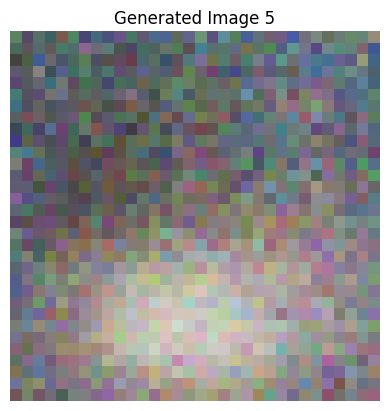

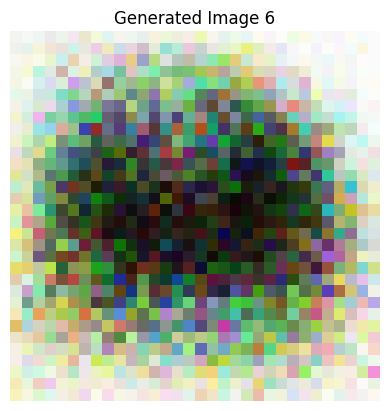

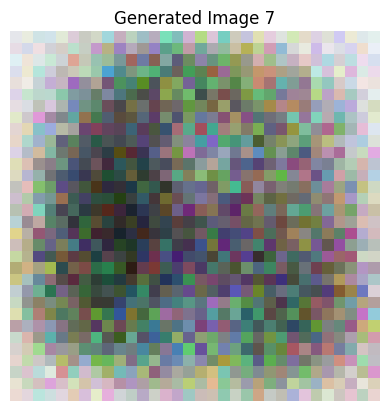

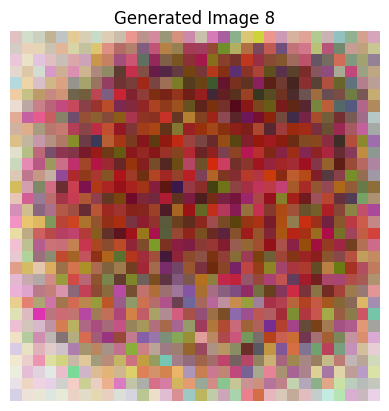

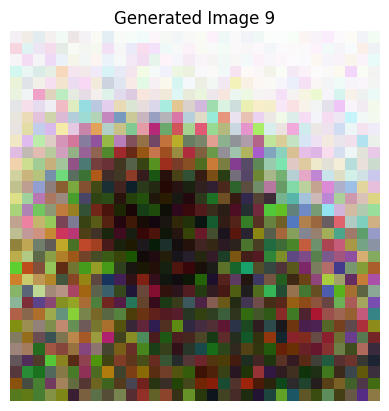

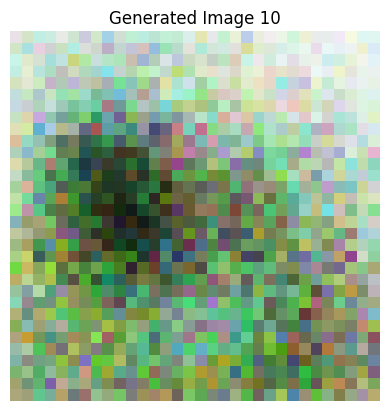

In [2]:



# Generate new images
def generate_images(generator, latent_dim, num_images):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(num_images, 32, 32, 3)  # Adjusted for CIFAR-100
    return generated_images

# Example: Generate 10 new images
new_images = generate_images(generator, latent_dim, 10)

# Print new images and their discriminator predictions
for i in range(len(new_images)):
    plt.imshow(new_images[i])
    plt.title(f'Generated Image {i+1}')
    plt.axis('off')
    plt.show()

In [19]:

# Discriminate images
def discriminate_images(discriminator, images):
    # Reshape images for the discriminator
    images = images.reshape(-1, 32, 32, 3)  # Adjusted for CIFAR-100
    # Predict the probability of each image being real (1) or fake (0)
    predictions = discriminator.predict(images)
    return predictions

# Example: Discriminate the new images
predictions = discriminate_images(discriminator, new_images)
print(predictions)

1/1 [==============================] - 0s 24ms/step
[[0.47838986]
 [0.47824627]
 [0.4597807 ]
 [0.4920209 ]
 [0.3974068 ]
 [0.48216814]
 [0.4534575 ]
 [0.4220157 ]
 [0.4140998 ]
 [0.45662755]]


1/1 [==============================] - 0s 10ms/step


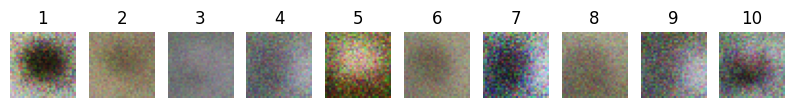

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize,rescale

# Generate new images
def generate_images(generator, latent_dim, num_images):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(num_images, 32, 32, 3)  # Adjusted for CIFAR-100
    return generated_images

# Example: Generate 10 new images
new_images = generate_images(generator, latent_dim, 10)

# Resize the images using bicubic interpolation
resized_images = np.zeros((len(new_images), 32, 32,3))
for i, image in enumerate(new_images):
    resized_images[i] = resize(image, (32, 32,3), mode='constant', order=3)

# Plot the resized images
plt.figure(figsize=(10, 10))
for i in range(len(resized_images)):
    plt.subplot(1, len(resized_images), i+1)
    plt.imshow(resized_images[i], cmap='gray')
    plt.title(f'{i+1}')
    plt.axis('off')
plt.show()

In [ ]:
####Parallel Processing-- Ignor this part of the code since being trained on different scenarios will not addup

In [3]:
import ray
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from ray.util import ActorPool


# Shut down Ray
ray.shutdown()
# Initialize Ray
ray.init()

# Load and preprocess the CIFAR-100 dataset with 1 or 2 classes
(train_images, train_labels), (_, _) = cifar100.load_data()
train_images = train_images / 255.0  # Normalize pixel values between 0 and 1

# Filter dataset for classes 0 and 1
class_indices = [4,6,8]
selected_indices = [i for i, label in enumerate(train_labels) if label[0] in class_indices]
train_images = train_images[selected_indices]

# Define the generator model
def build_generator(latent_dim):
    generator = Sequential()
    generator.add(Dense(128, input_dim=latent_dim))
    generator.add(LeakyReLU(alpha=0.01))
    generator.add(Dense(3072, activation='sigmoid'))
    generator.add(Reshape((32, 32, 3)))
    return generator

# Define the discriminator model
def build_discriminator():
    discriminator = Sequential()
    discriminator.add(Flatten(input_shape=(32, 32, 3)))
    discriminator.add(Dense(128))
    discriminator.add(LeakyReLU(alpha=0.01))
    discriminator.add(Dense(1, activation='sigmoid'))
    return discriminator

# Compile the discriminator model
def compile_discriminator():
    discriminator = build_discriminator()
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
    return discriminator

# Compile the combined GAN model
def compile_gan(latent_dim):
    generator = build_generator(latent_dim)
    discriminator = compile_discriminator()
    discriminator.trainable = False
    gan = Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return gan

# Define a function to train the GAN
@ray.remote(num_cpus=12)
def train_gan(train_images, latent_dim, epochs=15, batch_size=128):
    discriminator = compile_discriminator()
    gan = compile_gan(latent_dim)
    for epoch in range(epochs):
        # Train discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = gan.layers[0].predict(noise)
        real_images = train_images[np.random.randint(0, train_images.shape[0], batch_size)]
        X = np.concatenate([real_images, fake_images])
        y_dis = np.zeros(2 * batch_size)
        y_dis[:batch_size] = 0.9  # Label smoothing
        discriminator.trainable = True
        discriminator.train_on_batch(X, y_dis)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)

    # Return the trained generator model
    return gan.layers[0]


# Define the number of parallel training tasks

num_tasks = 40

# Execute the training tasks in parallel using Ray remote functions
generator_models = ray.get([train_gan.remote(train_images, 100, epochs=1000) for _ in range(num_tasks)])

# Save the generator weights from the last generator model obtained
final_generator = generator_models[-1]
final_generator.save_weights("generator_weights.h5")

2024-02-13 12:03:31,719	INFO worker.py:1724 -- Started a local Ray instance.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 543us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 759us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 551us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 567us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 742us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 604us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 1ms/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 555us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 1ms/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 672us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 750us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 884us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 679us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 523us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 573us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 628us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 500us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 452us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 549us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 458us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 554us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 518us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 874us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 599us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


1/4 [======>.......................] - ETA: 0s


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 451us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 641us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 629us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 608us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 578us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 583us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 669us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 518us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 521us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 674us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 855us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 591us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 646us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 593us/step


(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
(train_gan pid=43888) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


4/4 [==============================] - 0s 593us/step


1/1 [==============================] - 0s 22ms/step


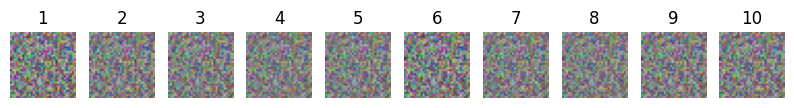

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# Load the trained generator model
generator = build_generator(latent_dim=100)  # Assuming latent_dim is defined in your environment
generator.load_weights("generator_weights.h5")  # Assuming you saved the weights as "generator_weights.h5"


# Generate new images
def generate_images(generator, num_images, latent_dim=100):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(num_images, 32, 32, 3)  # Adjusted for CIFAR-100
    return generated_images

# Define the number of images to generate
num_images = 10

# Example: Generate new images using the trained generator
new_images = generate_images(generator, num_images, latent_dim=100)

# Resize the images using bicubic interpolation
resized_images = np.zeros((len(new_images), 32, 32, 3))
for i, image in enumerate(new_images):
    resized_images[i] = resize(image, (32, 32, 3), mode='constant', order=3)

# Plot the resized images
plt.figure(figsize=(10, 10))
for i in range(len(resized_images)):
    plt.subplot(1, len(resized_images), i+1)
    plt.imshow(resized_images[i], cmap='gray')
    plt.title(f'{i+1}')
    plt.axis('off')
plt.show()